In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df.shape

(11251, 15)

## Data Cleaning

In [8]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [12]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## Exploratory Data Analysis

### Gender


<Axes: xlabel='Gender', ylabel='count'>

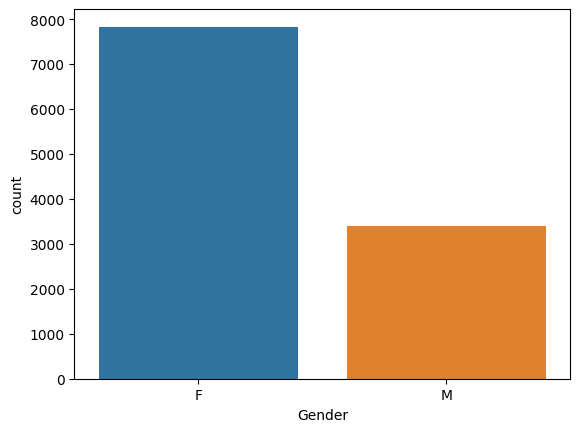

In [13]:
#Gender
sns.countplot(x = 'Gender',data = df, hue = "Gender")

In [14]:
#Amount spent by Gender
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

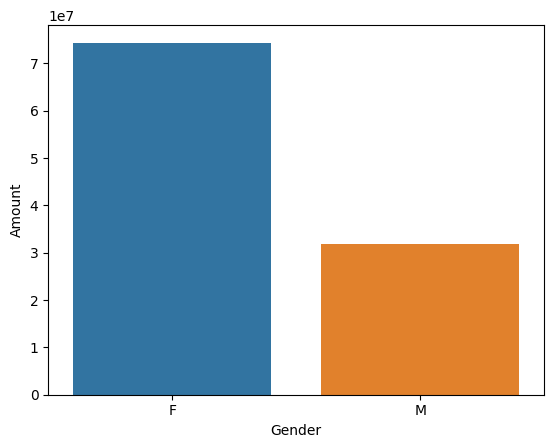

In [15]:
gender_amt = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = gender_amt, hue = "Gender")

This shows that most of the buyers are females  

### Age

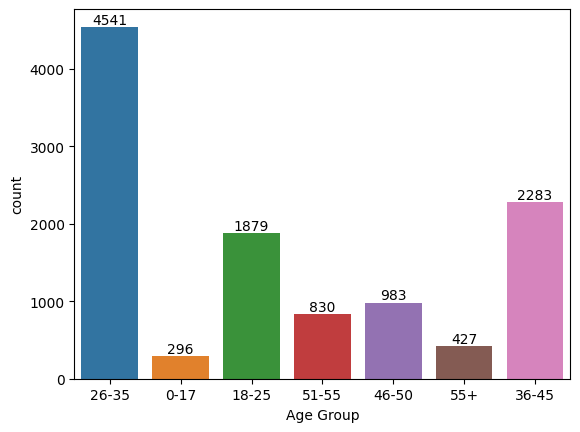

In [16]:
#Age Group
age_group = sns.countplot(data = df, x = 'Age Group', hue = "Age Group")
for bars in age_group.containers:
    age_group.bar_label(bars)

In [19]:
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


<Axes: xlabel='Age Group', ylabel='Amount'>

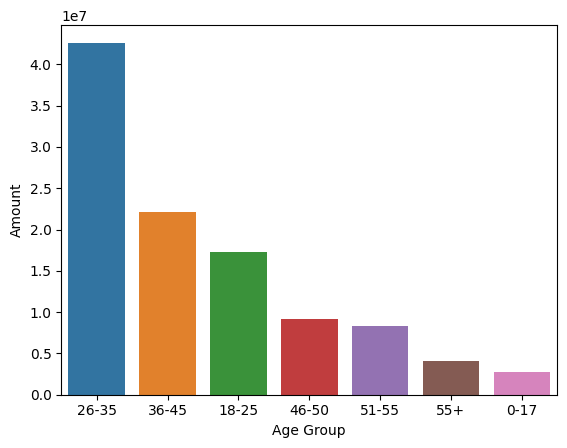

In [21]:
age_amt= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = age_amt,hue = 'Age Group')


This shows that most of the buyers are of age group between 26-35 yrs

### Occupation

<Axes: xlabel='Occupation', ylabel='count'>

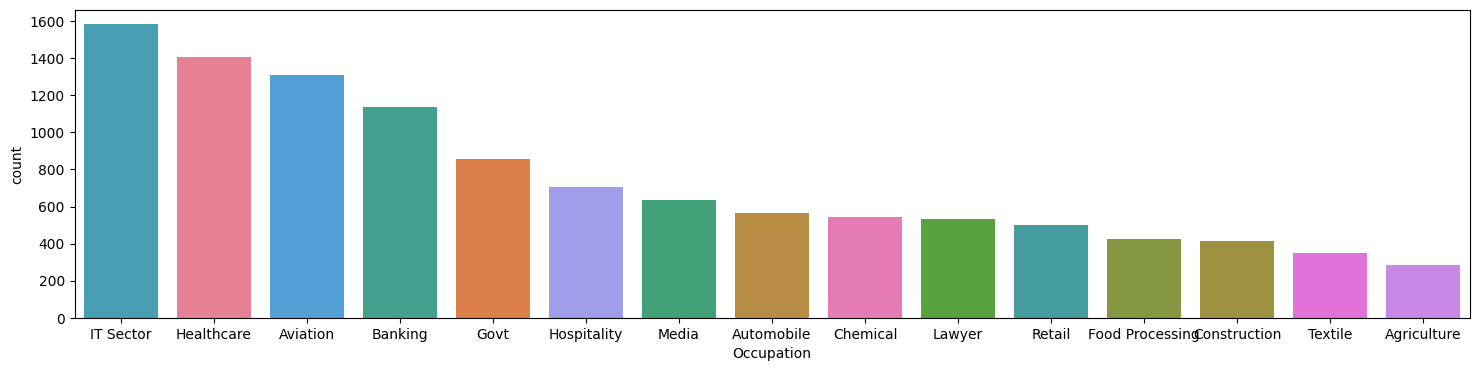

In [22]:
#Occupation
sorted_occupations = df['Occupation'].value_counts().index.tolist()
plt.figure(figsize=(18, 4))
sns.countplot(data = df, x = 'Occupation',hue = 'Occupation', order = sorted_occupations)

<Axes: xlabel='Occupation', ylabel='Amount'>

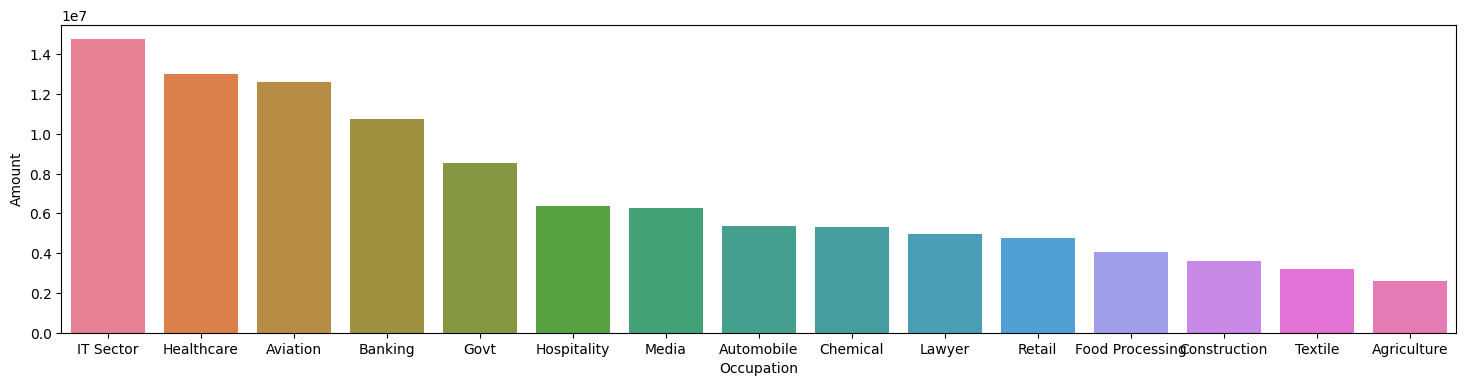

In [34]:
Occupation_amt = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(18, 4))
sns.barplot(data = Occupation_amt, x = 'Occupation',y= 'Amount',hue = 'Occupation')

This shows that most of the buyers are from IT, Healthcare and Aviation sector

### States

In [24]:
#Top 5 State(Orders)
df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


<Axes: xlabel='State', ylabel='Orders'>

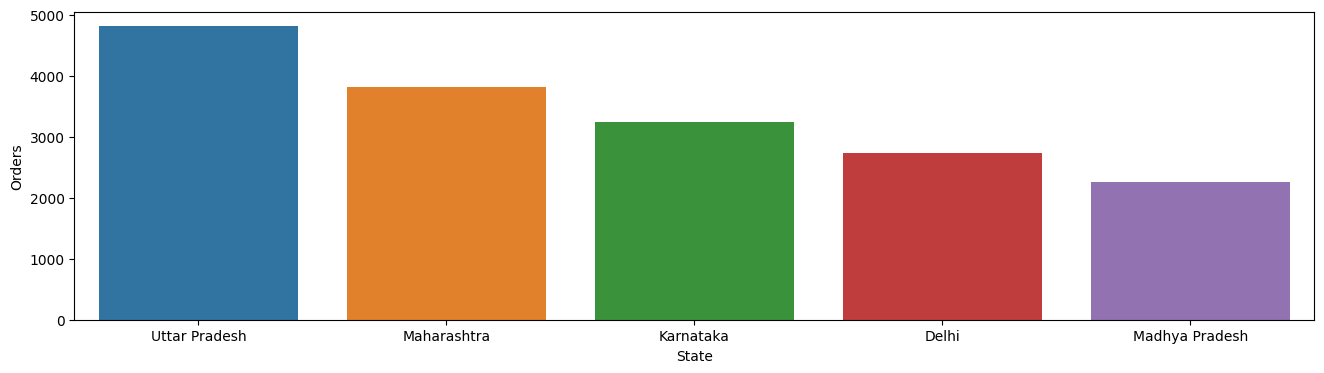

In [25]:
state_order = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

plt.figure(figsize=(16, 4))
sns.barplot(data = state_order, x = 'State',y= 'Orders', hue = "State")

In [26]:
#top 5 states (Amt)

df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00


<Axes: xlabel='State', ylabel='Amount'>

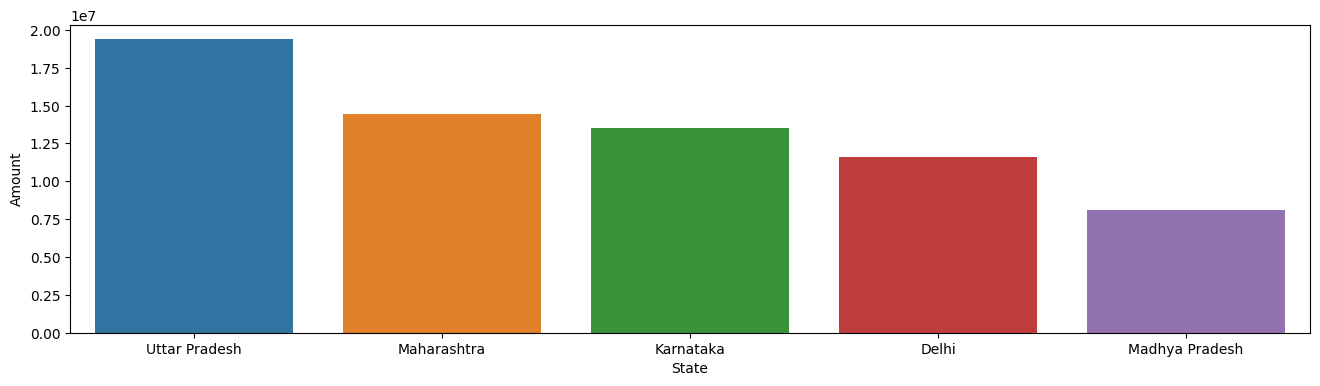

In [27]:
state_amt = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

plt.figure(figsize=(16, 4))
sns.barplot(data = state_amt, x = 'State',y= 'Amount', hue = 'State')

This shows that most of the buyers are from Uttar Pradesh, Maharashtra and Karnataka

### Marital_Status

In [28]:
# Marital_Status
df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Marital_Status,Gender,Amount
0,0,F,43786648.44
2,1,F,30549207.99
1,0,M,18338738.00
3,1,M,13574538.00


<Axes: xlabel='Marital_Status', ylabel='Amount'>

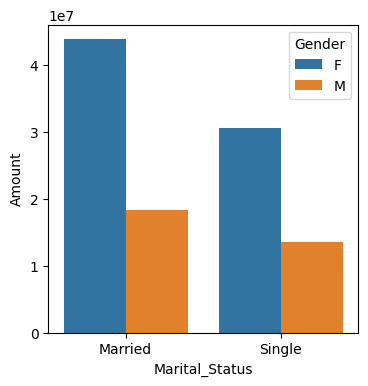

In [29]:
marital_Status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
marital_Status['Marital_Status'] = marital_Status['Marital_Status'].replace({0: 'Married', 1: 'Single'})
plt.figure(figsize=(4, 4))
sns.barplot(data = marital_Status, x = 'Marital_Status',y= 'Amount', hue='Gender')

### Product

<Axes: xlabel='Product_Category', ylabel='Amount'>

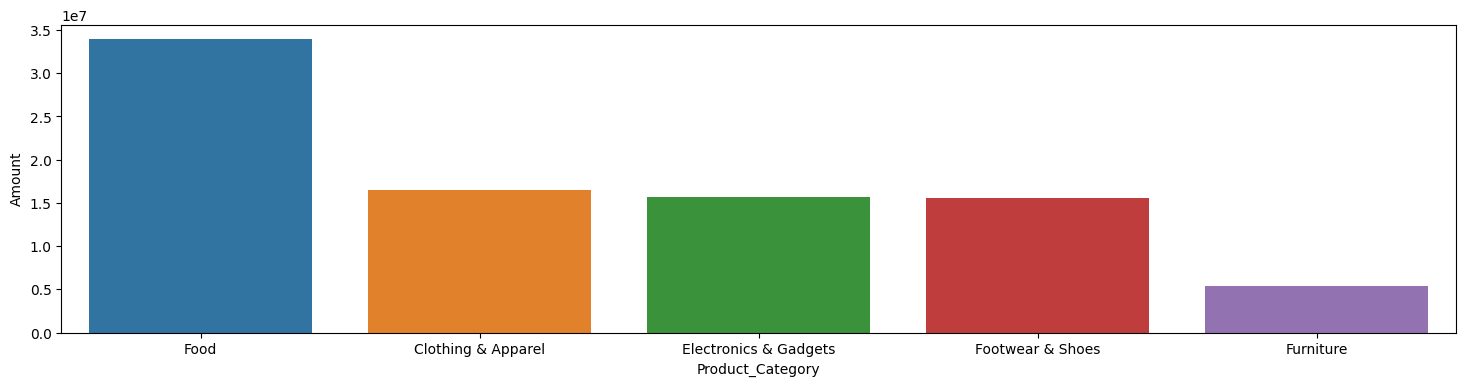

In [30]:
#Product Category
category_amt = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

plt.figure(figsize=(18, 4))
sns.barplot(data = category_amt, x = 'Product_Category',y= 'Amount', hue = 'Product_Category')

This shows that most of the sold products are from Food, Clothing and Electronics category

In [31]:
# Top 10 products
df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)


,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

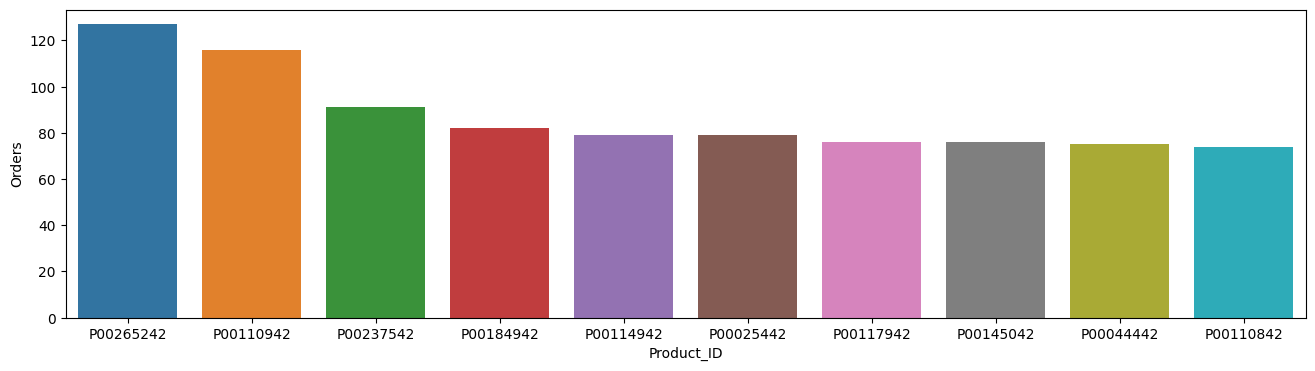

In [32]:
top_products = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(16, 4))
sns.barplot(data = top_products, x = 'Product_ID',y= 'Orders',hue = 'Product_ID' )

These are the Top 10 products

# Conclusion:

Women aged 26-35, married and employed in the IT, Healthcare, and Aviation sectors in the states of Uttar Pradesh, Maharashtra, and Karnataka, are more inclined to purchase items within the Food, Clothing, and Electronics categories